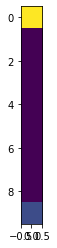

In [ ]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('bin.png')
hist = cv2.calcHist([img],[0],None,[10],[0,256])
plt.imshow(hist)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  import sys


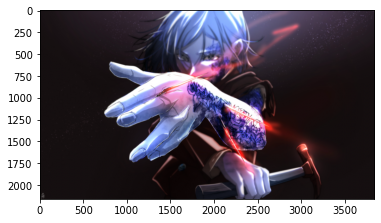

In [7]:
import cv2

from matplotlib import pyplot as plt

from skimage import filters
img=cv2.imread('hi.jpg')
gaussian_img = filters.gaussian(img, sigma=2)
plt.imshow(gaussian_img)

In [8]:
import numpy as np
a=np.ones((5, 5))
print(a)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """


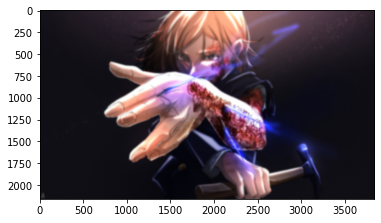

In [11]:

from skimage import io, filters
from matplotlib import pyplot as plt
img=io.imread('hi.jpg')
#plt.imshow(img)
gaussian_img=filters.gaussian(img, sigma=7)
plt.imshow(gaussian_img)

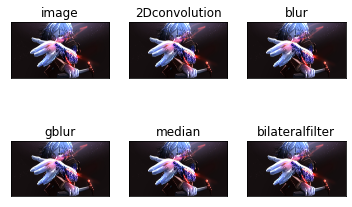

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 17 10:05:34 2022

@author: Admin
"""


#Smoothing operation is used to remove the noise in the image

#Different kind of filters are

#linear filter, Homogeneous filter, gaussian filter, median, bilateral


#Kernel is convolution matrix (or) mask, small matrix used for blurring, sharpening and edge detection


#In HF, k=1/Kwidth.Kheight (multiplied with kernel matrix)

#Kwidth  - width of the kernel

#Kheight - height of the kernel

#Kernel size is 5 * 5, width is 5 and height is 5.

import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('hi.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # converting image from BGR to RGB

#opencv read the image in BGR format

#define the kernel with 5 by 5
kernel=np.ones((5,5), np.float32)/25

out_img=cv2.filter2D(img, -1, kernel)
blur=cv2.blur(img, (5,5))

gblur=cv2.GaussianBlur(img, (5,5), 0)

median =cv2.medianBlur(img, 5)

bilateralfilter = cv2.bilateralFilter(img, 5, 40, 40)
#img - input image
#-1 desired depth of output image
#Apply kernel on the image using filter 2D
"""titles = ['image', '2Dconvolution']
images=[img, out_img]""" 


titles = ['image', '2Dconvolution', 'blur', 'gblur', 'median', 'bilateralfilter']
images=[img, out_img, blur, gblur, median, bilateralfilter] 

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()
    
#output image is smoothed (or blured bit)


#LPF -  helps to remove the noise
#HPF -  To find the edges in the image


#To have blur image 

#blur=cv2.blur(img, (5,5))

#result of 2D and blur is close, because the size of kernel is same



#Gaussian filter - using different weight kernel in both x and y direction.

#Therefore the pixel located in the middle of the kernel has a bigger weight.

#The weight decreaseas with distance from neighbhourhood center pixel.

#In the side we have less weight pixel, in the center it is high

#gblur=cv2.GaussianBlur(img, (5,5), 0)

#0 is sigma

#output from the gaussian filter is much more better.


#GF - designed to remove the high frequency noise

#median filter - replace the each pixel value with the median of it neighbhour pixels

#this filter is good when we have slat and pepper noise.

#in SP image pixels are distored

#in the black pixels we have white pixel noise

#in the white pixel we have black pixel noise

#white pixels are distored like salt, and black pixels were distored like pepper.

# median = cv2.medianBlur(img, 5)


#Bilateral filter -  by using HF median, GF - it dissolve the noise and also smooth the edges.

#but if you want to preserve the edge, to sharpen the edge use bilateral filter

#bilateralfilter = cv2.bilateralfilter(img, 9, 75, 75)

#9 -  diameter of each pixel 

# 75, sigma color -  filter sigma in the color space.

#sigma space - filter sigma in the co-ordinate space.

# edges are preserved in better way.

#hat broder is preserved.

#it removes the noise and also keep the edges sharp.





 

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


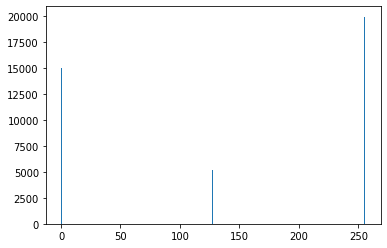

In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = np.zeros((200, 200), np.uint8)
cv.rectangle(img, (0,100), (200,200), (255), -1)
cv.rectangle(img, (0,50), (100,100), (127), -1)

#15000 pixels are black, 20000 pixels are white and 5000 pixels are gray
plt.hist(img.ravel(), 256, [0,256])
print(img)
plt.show()

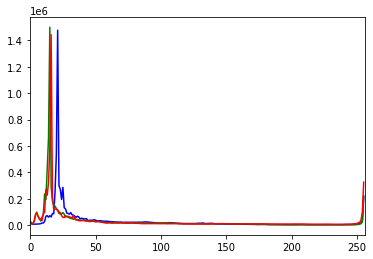

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('hi.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

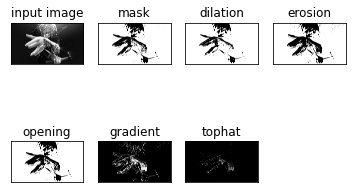

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('hi.jpg', cv2.IMREAD_GRAYSCALE)

_, mask =cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5), np.uint8)
dilation =cv2.dilate(mask, kernel, iterations=1)
erosion = cv2.erode(mask, kernel, iterations=1)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
tophat=cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)

titles = ['input image', 'mask', 'dilation', 'erosion', 'opening', 'gradient', 'tophat']
images = [img, mask, dilation, erosion, opening, gradient, tophat]

for i in range(7):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()
        

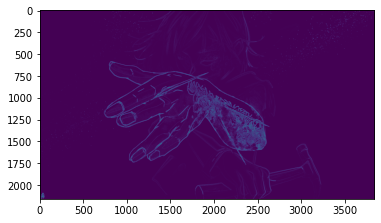

In [ ]:
#ROBERTS
import cv2 
import numpy as np
from scipy import ndimage

from matplotlib import pyplot as plt
  
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv2.imread("hi.jpg",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
plt.imshow(edged_img)

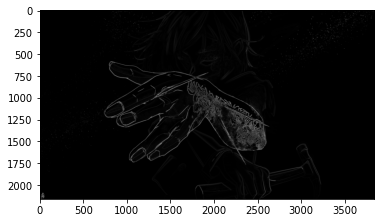

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('hi.jpg')).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Sobel Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newhorizontalImage = np.zeros((h, w))
newverticalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        newverticalImage[i - 1, j - 1] = abs(verticalGrad)

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

plt.figure()
plt.imshow(newgradientImage, cmap='gray')
plt.show()

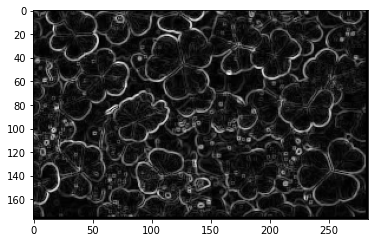

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('clover.jpg')).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Prewitt Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag


plt.figure()
plt.imshow(newgradientImage, cmap='gray')
plt.show()

In [ ]:
import cv2
import numpy as np


# Image negative
img = cv2.imread('hi.jpg',0)

# To ascertain total numbers of
# rows and columns of the image,
# size of the image
m,n = img.shape

# To find the maximum grey level
# value in the image
L = img.max()

# Maximum grey level value minus
# the original image gives the
# negative image
img_neg = L-img

# convert the np array img_neg to
# a png image
cv2.imwrite('Cameraman_Negative.png', img_neg)

# Thresholding without background
# Let threshold =T
# Let pixel value in the original be denoted by r
# Let pixel value in the new image be denoted by s
# If r<T, s= 0
# If r>T, s=255

T = 150

# create a array of zeros
img_thresh = np.zeros((m,n), dtype = int)

for i in range(m):
 
 for j in range(n):
  
  if img[i,j] < T:
   img_thresh[i,j]= 0
  else:
   img_thresh[i,j] = 255


# Convert array to png image
cv2.imwrite('Cameraman_Thresh.png', img_thresh)

# the lower threshold value
T1 = 100

# the upper threshold value
T2 = 180

# create a array of zeros
img_thresh_back = np.zeros((m,n), dtype = int)

for i in range(m):
 
 for j in range(n):
  
  if T1 < img[i,j] < T2:
   img_thresh_back[i,j]= 255
  else:
   img_thresh_back[i,j] = img[i,j]

# Convert array to png image
cv2.imwrite('Cameraman_Thresh_Back.png', img_thresh_back)



KeyboardInterrupt: ignored

In [ ]:
import cv2
import numpy as np

img = cv2.imread('hi.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
 
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
 
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
 
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
 
cv2.imwrite('linesDetected.jpg', img)

True

LAB 3

In [ ]:
from PIL import Image, ImageDraw
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt

# Load image:
input_image = Image.open("hi.jpg")
input_pixels = input_image.load()
width, height = input_image.width, input_image.height

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Convert to grayscale
intensity = np.zeros((width, height))
for x in range(width):
    for y in range(height):
        intensity[x, y] = sum(input_pixels[x, y]) / 3

# Compute convolution between intensity and kernels
for x in range(1, input_image.width - 1):
    for y in range(1, input_image.height - 1):
        magx = intensity[x + 1, y] - intensity[x - 1, y]
        magy = intensity[x, y + 1] - intensity[x, y - 1]

        # Draw in black and white the magnitude
        color = int(sqrt(magx**2 + magy**2))
        draw.point((x, y), (color, color, color))
    
output_image.save("hi_edge.jpg")


TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
import cv2
import numpy as np

# Read image.
img = cv2.imread('dog.jpg', cv2.IMREAD_COLOR)

# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))

# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred,
    cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
   param2 = 30, minRadius = 1, maxRadius = 40)

# Draw circles that are detected.
if detected_circles is not None:

 # Convert the circle parameters a, b and r to integers.
 detected_circles = np.uint16(np.around(detected_circles))

 for pt in detected_circles[0, :]:
  a, b, r = pt[0], pt[1], pt[2]

  # Draw the circumference of the circle.
  cv2.circle(img, (a, b), r, (0, 255, 0), 2)

  # Draw a small circle (of radius 1) to show the center.
  cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
  cv2.imwrite('detected circles_final.jpg', img)
